In [20]:
# Step 1: Prepare Data:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/Infectious Disease 2001-2014.csv')

# Display the first few rows to get an overview
df.head()

,Disease,County,Year,Sex,Count,Population,Rate,CI.lower,CI.upper,Unstable
0,Amebiasis,California,2001,Total,571,34514777,1.654,1.521,1.796,
1,Amebiasis,California,2001,Female,176,17340743,1.015,0.871,1.176,
2,Amebiasis,California,2001,Male,365,17174034,2.125,1.913,2.355,
3,Amebiasis,California,2002,Total,442,34940334,1.265,1.150,1.389,
4,Amebiasis,California,2002,Female,145,17555714,0.826,0.697,0.972,


In [16]:
# Step 2: Gather Necessary Data:

# Select relevant columns
selected_columns = ['Disease', 'Year', 'Count', 'Population', 'Rate', 'Sex']
df = df[selected_columns]

# Filter data based on your analysis requirements (example filter by Disease)
filtered_data = df[df['Disease'] == 'Your_Target_Disease']


In [17]:
# step 3: Handle Categorical and Missing Data:

# Handle categorical data (example: 'Sex' column)
df = pd.get_dummies(df, columns=['Sex'])

# Handling missing data (e.g., filling missing values with mean for 'Rate' column)
df['Rate'].fillna(df['Rate'].mean(), inplace=True)

Step 4: Provide Insight into the Methods I chose and why I chose them:

 Data Preparation Explanation:
 We selected the columns 'Disease', 'Year', 'Count', 'Population', 'Sex 'and 'Rate' as they are essential for our analysis.

 For the 'Sex' column, we performed one-hot encoding to convert it into numerical form, making it suitable for analysis.

 For missing data in the 'Rate' column, we imputed the missing values with the mean to ensure that we retain as much data as possible for analysis.


**Asking Questions For Getting answer**


<ipython-input-36-d276b2450cc3>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Year', y='Rate', hue='Sex', ci=None)


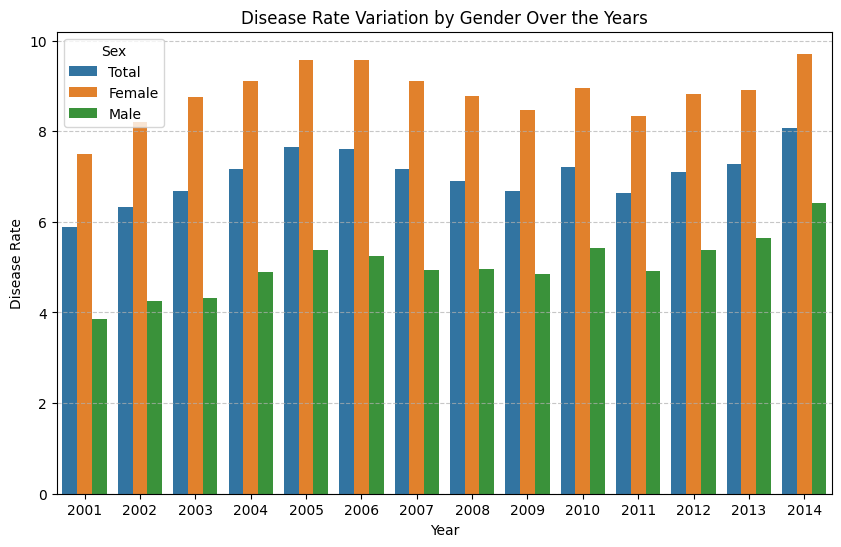

In [36]:
# How does the disease rate vary by gender over the years?

# Create a bar plot to compare disease rate by gender
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Year', y='Rate', hue='Sex', ci=None)
plt.title('Disease Rate Variation by Gender Over the Years')
plt.xlabel('Year')
plt.ylabel('Disease Rate')
plt.legend(title='Sex')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

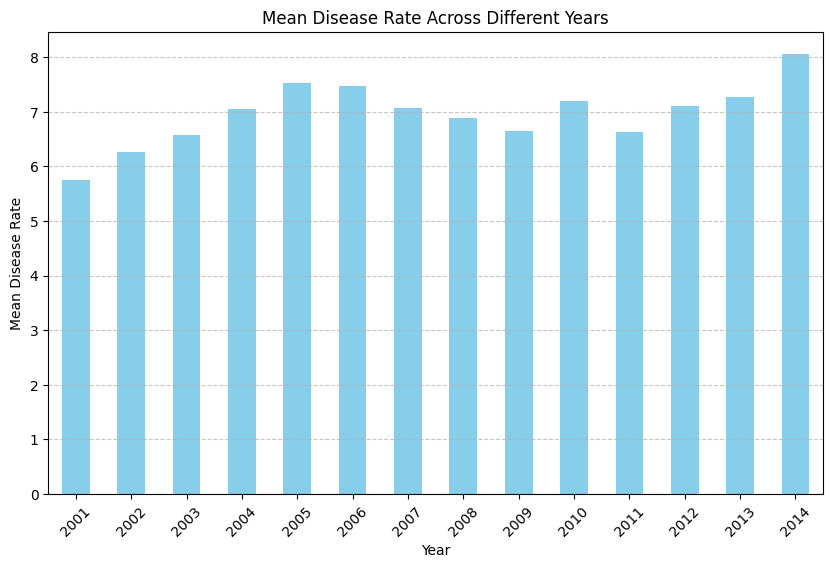

In [22]:
#  What is the distribution of disease rates across different years?

# Group data by year and calculate the mean disease rate
yearly_mean_rate = df.groupby('Year')['Rate'].mean()

# Create a bar plot
plt.figure(figsize=(10, 6))
yearly_mean_rate.plot(kind='bar', color='skyblue')
plt.title('Mean Disease Rate Across Different Years')
plt.xlabel('Year')
plt.ylabel('Mean Disease Rate')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

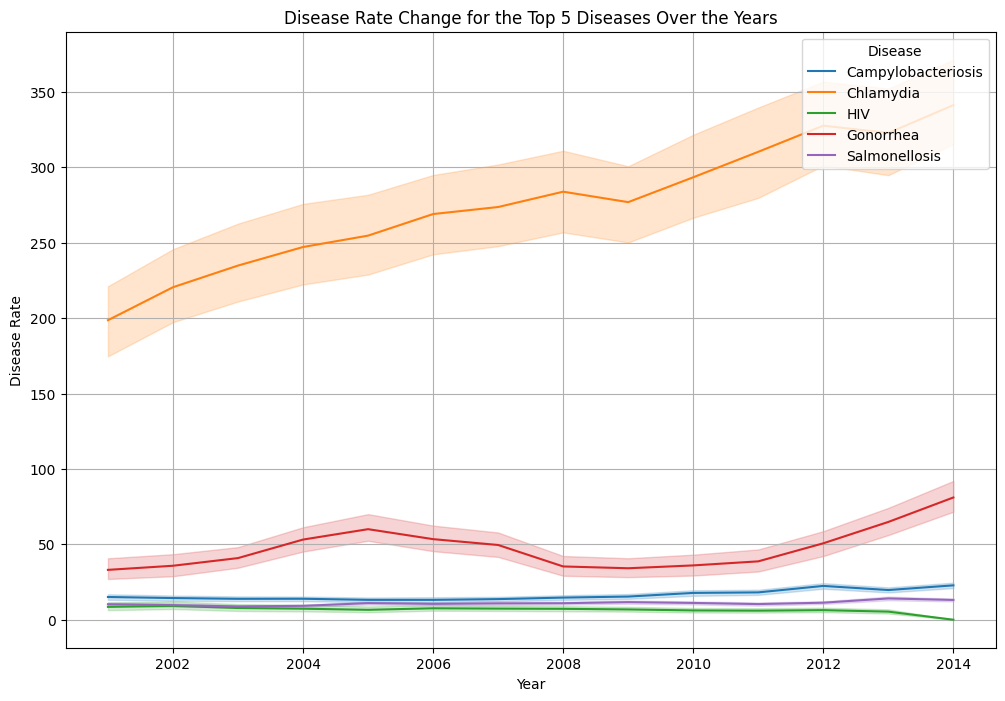

In [28]:
# How have disease rates changed for the top 5 diseases with the highest counts?

# Group data by disease and calculate the total count for each disease
top_diseases = df.groupby('Disease')['Count'].sum().sort_values(ascending=False).head(5).index

# Filter data for the top 5 diseases
top_diseases_data = df[df['Disease'].isin(top_diseases)]

# Create a line plot to visualize the change in disease rates
plt.figure(figsize=(12, 8))
sns.lineplot(data=top_diseases_data, x='Year', y='Rate', hue='Disease', markers=True)
plt.title('Disease Rate Change for the Top 5 Diseases Over the Years')
plt.xlabel('Year')
plt.ylabel('Disease Rate')
plt.legend(title='Disease', loc='upper right')
plt.grid(True)
plt.show()



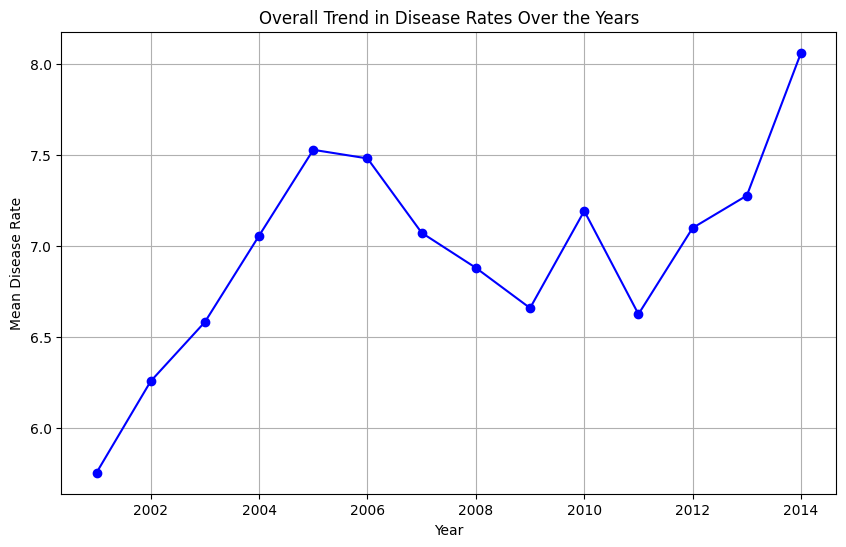

In [33]:
# What is the overall trend in disease rates over the years for all data in the dataset?

# Group data by year and calculate the mean disease rate for each year
yearly_mean_rate = df.groupby('Year')['Rate'].mean()

# Create a line plot to visualize the trend in disease rates over the years
plt.figure(figsize=(10, 6))
yearly_mean_rate.plot(kind='line', color='blue', marker='o', linestyle='-')
plt.title('Overall Trend in Disease Rates Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Disease Rate')
plt.grid(True)
plt.show()

